In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd /content/drive/My Drive/DS/Practice/Mnist

/content/drive/My Drive/DS/Practice/Mnist


**Import Lib**

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from numpy import argmax
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from google.colab import files
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import cv2

**Load data and prepare data**

(45000, 28, 28)
(15000, 28, 28)
1


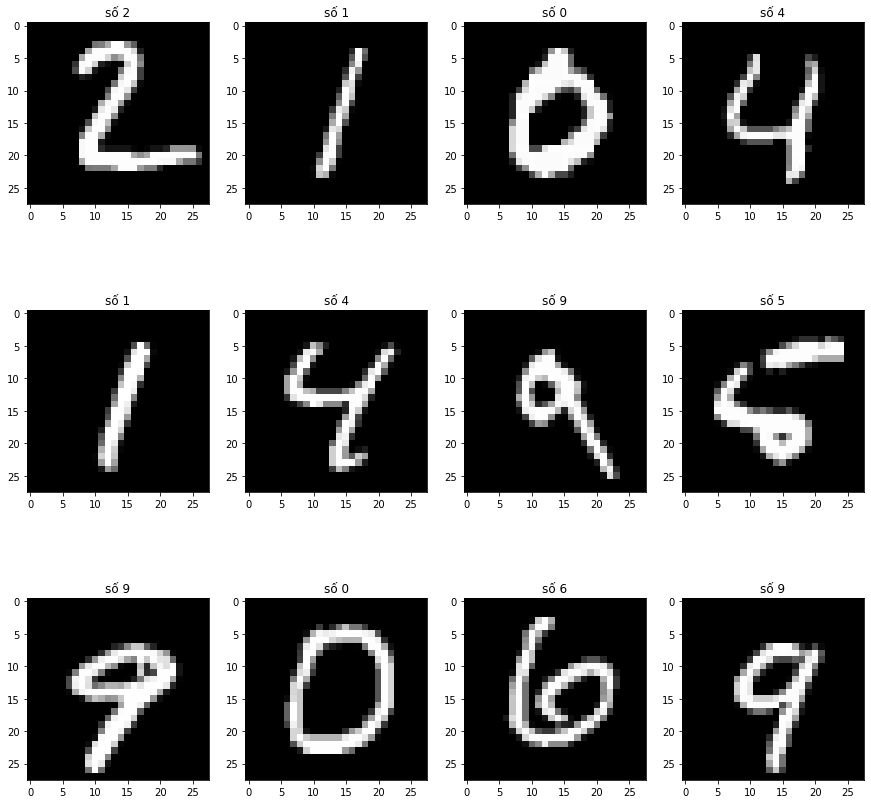

In [33]:
#load data from mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)
print(X_train.shape)
print(X_val.shape)
print(y_train[0])

#plot some images
# for i in range(9):
# 	plt.subplot(3, 3,i+1)
# 	plt.title('Số')
# 	plt.imshow(X_test[i], cmap=plt.get_cmap('gray'))
# plt.show()


fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 3

X_test_display = X_test
for i in range(1, columns*rows +1):
	ax = fig.add_subplot(rows, columns, i)
	label = y_test[i]
	plt.title('số '+str(label))
	plt.imshow(X_test_display[i], cmap=plt.get_cmap('gray'))
plt.show()

#reshape data to gray
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_val = X_val.reshape((X_val.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

#Normalize data range 0-1
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

**Define Model**

In [34]:
filter = 32
kernel_size = (3, 3)
input = (28, 28, 1) 

#define model
model = Sequential()
model.add(Conv2D(filter, kernel_size, activation='relu', input_shape=input))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               692352    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

**Compile Model**

In [35]:
model.compile(loss='sparse_categorical_crossentropy',
			optimizer='adam',
			metrics=['accuracy'])

**Fit Model**

In [ ]:
# checkpoint
filepath="top.weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor= 'val_accuracy' , verbose=1, save_best_only=True,
mode= max )
callbacks_list = [checkpoint]

N = model.fit(X_train, y_train, validation_split=0.33, epochs=100, batch_size=32, callbacks=callbacks_list, verbose=2)

**Save Model**

In [ ]:
model.save_weights('myModel.h5')

**Load weight**

In [36]:
model.load_weights('myModel.h5')

**Visualize Loss and Accuracy**

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


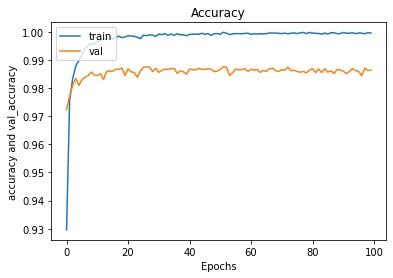

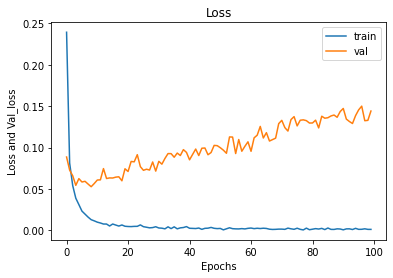

In [ ]:
print(N.history.keys())
fig = plt.figure()
#plot accuracy and val_awss2ccuracy
plt.plot(N.history['accuracy'])
plt.plot(N.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('accuracy and val_accuracy')
plt.title('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.figure()
#plot loss and val_loss
plt.plot(N.history['loss'])
plt.plot(N.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss and Val_loss')
plt.title('Loss')
plt.legend(['train', 'val'])
plt.show()

**Avaluate Model**

In [37]:
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print('Accuracy: %.3f' % acc)
print('Loss: %.3f' % loss)

313/313 - 1s - loss: 0.1428 - accuracy: 0.9856
Accuracy: 0.986
Loss: 0.143


**Predict**

Saving 5.jpg to 5 (3).jpg
Dự đoán: số 5


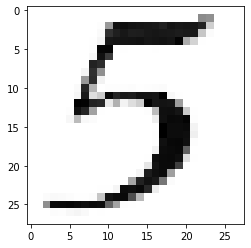

In [ ]:
upload = files.upload()

for fn in upload.keys():
  path = './' + fn
  gray = load_img(path, target_size=(28, 28))
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray = cv2.resize(gray, (28, 28))
  plt.imshow(gray, cmap=plt.get_cmap('gray'))
  x = img_to_array(gray) / 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(x, batch_size=10)
  print('Dự đoán: số %d' % argmax(classes))

In [38]:
y_pred = model.predict(X_test)

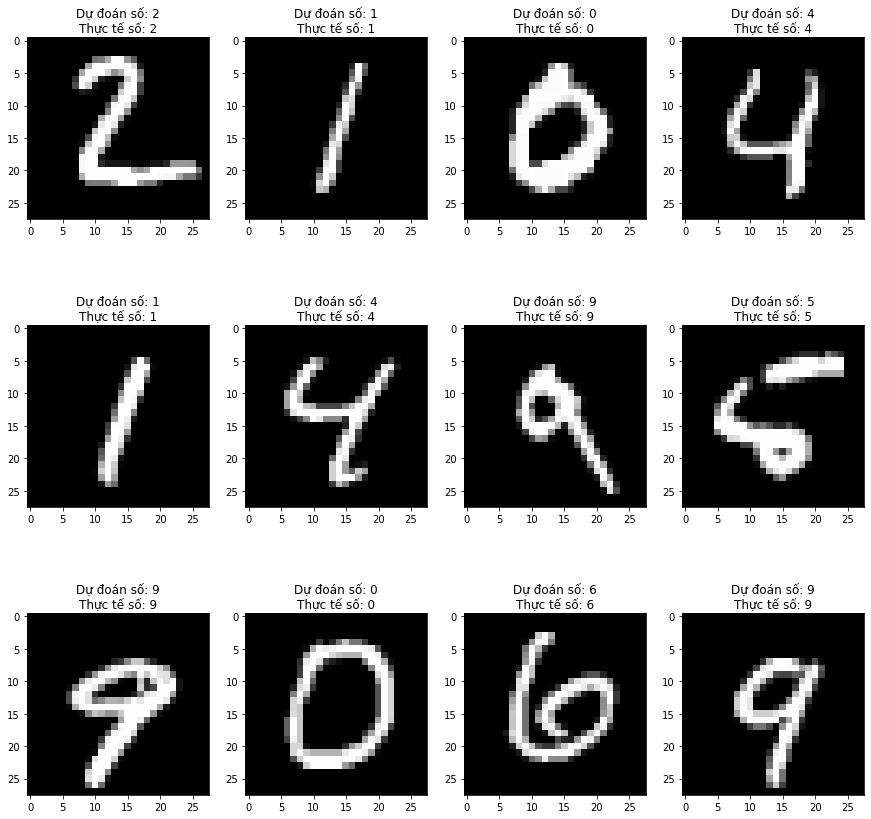

In [43]:
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 3

for i in range(1, columns*rows +1):
	ax = fig.add_subplot(rows, columns, i)
	plt.title("Dự đoán số: "+ str(np.argmax(y_pred[i])) + "\n"+"Thực tế số: "+ str(y_test[i]))
	plt.imshow(X_test_display[i], cmap=plt.get_cmap('gray'))
plt.show()